In [1]:
#making a correlation matrix (heatmap) for environmental drivers influencing SOS, EOS and POS

import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
#import csv with correlation matrix for sos
r_sos_ps1 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_sos_spring.csv")
r_sos_ps2 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_sos_winter.csv")
r_eos_ps1 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_eos_summer.csv")
r_eos_ps2 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_eos_spring.csv")
r_pos_ps1 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_pos_MJJ.csv")
r_pos_ps2 = pd.read_csv(r"..\Data\Processed\Correlation_Analysis\Environmental_Factors\spmn_r_env_pos_FMA.csv")
#make a dictionary for merging ecoregion codes to ecoregion name
ecr_name_dict = {
    81003: "EHASM",
    40115: "HSBF",
    40301: "HSPF",
    40403: "WHBF",
    40401: "EHBF",
    81021: "WHASM",
    40701: "TDSG",
    40501: "EHSCF",
    40502: "WHSCF"
}


In [3]:
# Convert ecoregion to int and map to acronyms
r_sos_ps1['Ecoregion'] = pd.to_numeric(r_sos_ps1['ecoregion'], errors='coerce').map(ecr_name_dict)
r_sos_ps2['Ecoregion'] = pd.to_numeric(r_sos_ps2['ecoregion'], errors='coerce').map(ecr_name_dict)
r_eos_ps1['Ecoregion'] = pd.to_numeric(r_eos_ps1['ecoregion'], errors='coerce').map(ecr_name_dict)
r_eos_ps2['Ecoregion'] = pd.to_numeric(r_eos_ps2['ecoregion'], errors='coerce').map(ecr_name_dict)
r_pos_ps1['Ecoregion'] = pd.to_numeric(r_pos_ps1['ecoregion'], errors='coerce').map(ecr_name_dict)
r_pos_ps2['Ecoregion'] = pd.to_numeric(r_pos_ps2['ecoregion'], errors='coerce').map(ecr_name_dict)


In [4]:
r_sos_ps1 = r_sos_ps1.drop(columns= ["ecoregion"])
r_sos_ps2 = r_sos_ps2.drop(columns= ["ecoregion"])
r_eos_ps1 = r_eos_ps1.drop(columns= ["ecoregion"])
r_eos_ps2 = r_eos_ps2.drop(columns= ["ecoregion"])
r_pos_ps1 = r_pos_ps1.drop(columns= ["ecoregion"])
r_pos_ps2 = r_pos_ps2.drop(columns= ["ecoregion"])

r_sos_ps1 = (r_sos_ps1[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_sos_ps1 = r_sos_ps1.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})

r_sos_ps2 = (r_sos_ps2[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_sos_ps2 = r_sos_ps2.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})

r_eos_ps1 = (r_eos_ps1[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_eos_ps1 = r_eos_ps1.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})
r_eos_ps2 = (r_eos_ps2[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_eos_ps2 = r_eos_ps2.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})

r_pos_ps1 = (r_pos_ps1[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_pos_ps1 = r_pos_ps1.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})
r_pos_ps2 = (r_pos_ps2[['Ecoregion', 'Temperature', 'Precipitation', 'SoilMoisture', 'SolarRadiation']]
                .sort_values(by = "Ecoregion", ascending = True )).set_index("Ecoregion")
r_pos_ps2 = r_pos_ps2.rename(columns={'SoilMoisture':'Soil Moisture', 'SolarRadiation':'Solar Radiation'})

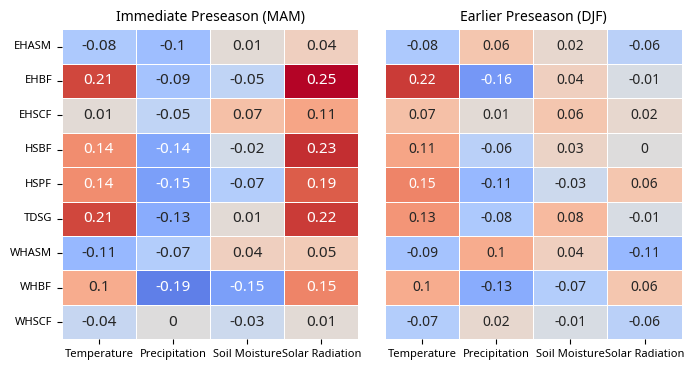

In [5]:
plt.rcParams['font.family'] = 'Sans serif collection'
plt.rcParams['font.size'] = 10  

# Create figure with manual width control
fig = plt.figure(figsize=(7.1, 3.8))

# Define width ratios for the two plots (adjust these to tune the sizes)
# Format: [left_plot_width, right_plot_width]
# Try adjusting these values to make them equal - start with [1, 1.15] or similar
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)

# Create axes from gridspec
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# First heatmap (left) - Spring preseason
sns.heatmap(r_sos_ps1, 
            annot=True,
            annot_kws={'fontsize': 11},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,       
            linewidths=.5,
            cbar=False,  
            ax=ax0)
ax0.set_title('Immediate Preseason (MAM)', fontsize=10)
ax0.set_ylabel('') 
ax0.set_xlabel('')  

# Second heatmap (right) - Winter preseason
sns.heatmap(r_sos_ps2, 
            annot=True,
            annot_kws={'fontsize': 10},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,   
            cbar = False,    
            linewidths=.5,
            ax=ax1)
ax1.set_title('Earlier Preseason (DJF)', fontsize=10)
ax1.set_ylabel('\n')  
ax1.set_yticklabels([])  
ax1.tick_params(left=False)  
ax0.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax1.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax0.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax1.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
plt.tight_layout()
plt.savefig(r"../../Figures_New/Junk/Correlation_Heatmap_SOS.tif", dpi=300, format='tiff')
plt.show()


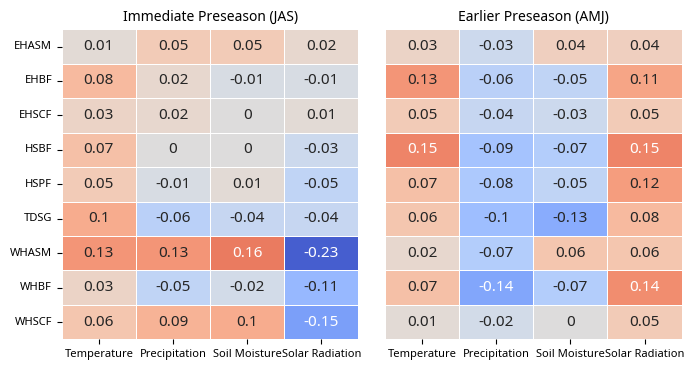

In [6]:
plt.rcParams['font.family'] = 'Sans serif collection'
plt.rcParams['font.size'] = 10  

# Create figure with manual width control
fig = plt.figure(figsize=(7.1, 3.8))

# Define width ratios for the two plots (adjust these to tune the sizes)
# Format: [left_plot_width, right_plot_width]
# Try adjusting these values to make them equal - start with [1, 1.15] or similar
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)

# Create axes from gridspec
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# First heatmap (left) - Spring preseason
sns.heatmap(r_eos_ps1, 
            annot=True,
            annot_kws={'fontsize': 11},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,       
            linewidths=.5,
            cbar=False,  
            ax=ax0)
ax0.set_title('Immediate Preseason (JAS)', fontsize=10)
ax0.set_ylabel('') 
ax0.set_xlabel('')  

# Second heatmap (right) - Winter preseason
sns.heatmap(r_eos_ps2, 
            annot=True,
            annot_kws={'fontsize': 11},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,
            cbar = False,       
            linewidths=.5,
            ax=ax1)
ax1.set_title('Earlier Preseason (AMJ)', fontsize=10)
ax1.set_ylabel('\n')  
ax1.set_yticklabels([])  
ax1.tick_params(left=False)  # Turn off y-ticks on the right plot
ax1.set_xlabel('')
ax0.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax1.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax0.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
ax1.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 8, rotation = 0)
plt.tight_layout()
plt.savefig(r"../../Figures_New/Junk/Correlation_Heatmap_EOS.tif", dpi=300, format='tiff')
plt.show()


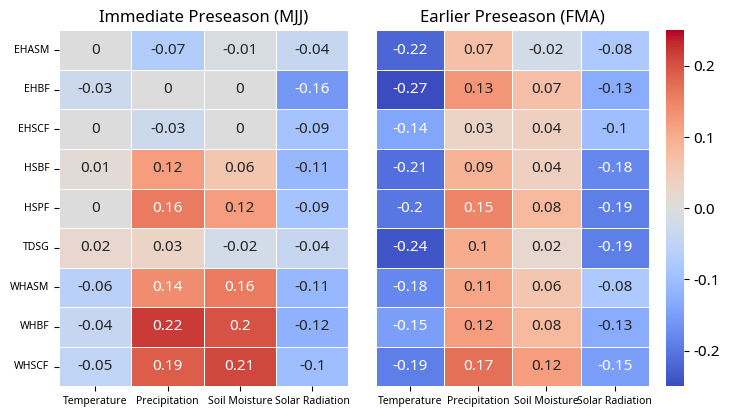

In [11]:
plt.rcParams['font.family'] = 'Sans serif collection'
plt.rcParams['font.size'] = 11  

# Create figure with manual width control
fig = plt.figure(figsize=(7.5, 4.3))

# Define width ratios for the two plots (adjust these to tune the sizes)
# Format: [left_plot_width, right_plot_width]
# Try adjusting these values to make them equal - start with [1, 1.15] or similar
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.18], figure=fig)

# Create axes from gridspec
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# First heatmap (left) - Spring preseason
sns.heatmap(r_pos_ps1, 
            annot=True,
            annot_kws={'fontsize': 11},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,       
            linewidths=.5,
            cbar=False,  
            ax=ax0)
ax0.set_title('Immediate Preseason (MJJ)', fontsize=12)
ax0.set_ylabel('') 
ax0.set_xlabel('')  

# Second heatmap (right) - Winter preseason
sns.heatmap(r_pos_ps2, 
            annot=True,
            annot_kws={'fontsize': 11},  
            vmin=-0.25,
            vmax=0.25,     
            cmap='coolwarm',
            center=0,       
            linewidths=.5,
            ax=ax1)
ax1.set_title('Earlier Preseason (FMA)', fontsize=12)
ax1.set_ylabel('\n')  
ax1.set_yticklabels([])  
ax1.tick_params(left=False)  # Turn off y-ticks on the right plot
ax1.set_xlabel('')
ax0.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 7.5, rotation = 0)
ax1.tick_params(axis='y', which='both', bottom=True, labelbottom=True, labelsize = 7.5, rotation = 0)
ax0.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 7.5, rotation = 0)
ax1.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize = 7.5, rotation = 0)
plt.tight_layout()
plt.savefig(r"../../Figures_New/Junk/Correlation_Heatmap_POS.tif", dpi=300, format='tiff')
plt.show()
